<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Fresnel-based DOE Stokes analyzer:fotodetector </font>
</div>

- **Fecha**: 2022/03/15
        
- **Autores**: 
    - Javier Alda
    - Luis Miguel Sánchez Brea

   
- **Estado**:  Development

- **Objetivos**: 
    - Generar los fotodetectores de forma independiente


# Importaciones

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
import diffractio
import matplotlib as mpl

from diffractio import degrees, mm, plt, sp, um, np, nm
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY



In [63]:
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.stokes import Stokes

In [64]:
from py_aocg.stokes_analyzer.stokes_analyzer import Detector, Stokes_analyzer, compute_stokes_mask, states_standard

In [65]:
mpl.rcParams['figure.dpi'] = 100 #dpi
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.formatter.useoffset'] = False

In [66]:
np.printoptions(precision=4);
import warnings
warnings.filterwarnings('ignore') 

### Generation of the Polarization State Analyzer with N fresnel zones

In [67]:
num_sectors = 6
focal = 125 * mm
r_shift = 1 * mm

detector_radius = 250*um
detector_size = 500*um

has_draw = True


In [68]:
num_pixels = 256

length = 4*mm
x0 = np.linspace(-length / 2, length / 2, num_pixels)
y0 = np.linspace(-length / 2, length / 2, num_pixels)
wavelength = 0.6238 * um


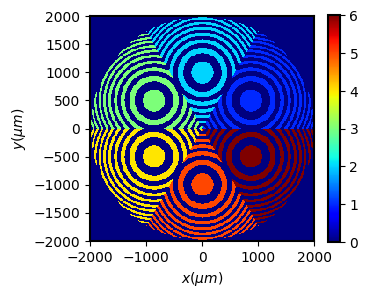

In [69]:
i_stokes_analyzer = Stokes_analyzer(x0, y0, wavelength)
i_stokes_analyzer.stokes_analyzer_lens_indexes(focal, r_shift, num_sectors=6)
i_stokes_analyzer.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)

# Generación del fotodectector

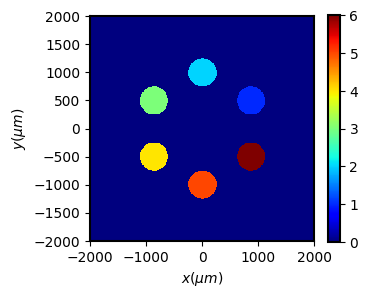

In [80]:
detector_1 = Detector(x0, y0, wavelength)
detector_1.circular(focal, r_shift,  detector_radius,  num_sectors=6,    has_draw=True)
detector_1.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)


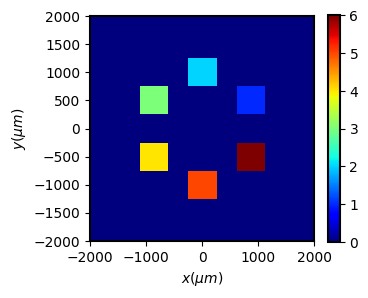

In [81]:
detector_2 = Detector(x0, y0, wavelength)
detector_2.square(focal, r_shift,   num_sectors=6,  detector_size = 500*um,     has_draw=True)
detector_2.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)


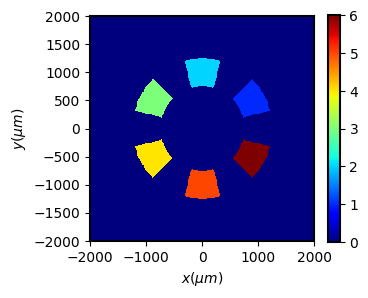

In [82]:
detector_3 = Detector(x0, y0, wavelength)
detector_3.slices(focal, r_shift,   num_sectors=6,  fill_sectors=0.5, radius_size = 500*um,    has_draw=True)
detector_3.draw(kind='amplitude', has_colorbar='vertical', colormap_kind='jet'); plt.clim(vmin=0)
